<a href="https://colab.research.google.com/github/kurealnum/dsrp-2025/blob/main/DSRP_Written_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Central Government Debt levels of other countries can predict Central Government Debt levels of the United States
By Oscar Gaske

## Abstract

TODO

# Background
Our economy determines a number of different factors in our daily lives. From mortgage rates to the price of eggs, our economy is constantly changing and fluctuating. Thus, an understanding of our economy and the ability to make accurate and precise predictions on how it might perform in the next 5, 15, or even 30 years can benefit all of us. There are many different methods for predicting the future of our economy, however the provided dataset that was utilized for this research included the Central Government Debt (CGD) metric that was used.

CGD refers to the total stock of debt liabilities issued by the central government as a share of GDP. The "central government" is the core goverment of a country -- for instance, in the United States, central government refers to the federal government.

With that being said, the primary research question is as follows: can CGD levels of other countries predict CGD levels of the United States? "(O)ther countries" will be more strictly defined in the following sections.

# Results

This research utilized a least squares linear regression model to predict CGD levels for the United States. Other models were considered, such as Ridge regression, Bayesian regression, and Lasso regression. However, none of these models were found to be applicable for the data.

As input to the least squares linear regression model, the CGD levels of 21 countries were used. These countries were chosen not by a stastical test, but by the number of data points that each country had. The Central Government Debt dataset spans from 1950 to 2023, inclusive, and as of 2023, has data for 177 countries. However, the majority of countries (156 countries) in the dataset had either a missing year or sections of missing years, making it challenging to appropriately utilize these countries in a machine learning model. Thus, this research only utilized countries that had all 74 data points from 1950 to 2023 -- 21 out of 177 countries. It should also be noted that there was no reason given as to why only ~12% of countries had consistent data.

The following figure describes the spread of CGD for the 21 countries used as input to the linear regression model, plus the United States. Specifically, each year is a box and whiskers plot for the CGD data of the 21 countries plus the United States for that year. Interpreting the graph, it can be shown that while outliers have appeared in recent years, CGD still follows a consistent trend: slow growth. This is debatable, however IQR has greatly increased since the 1970s. Additionally, the top whisker has grown to be much higher than it was in the 1970s.

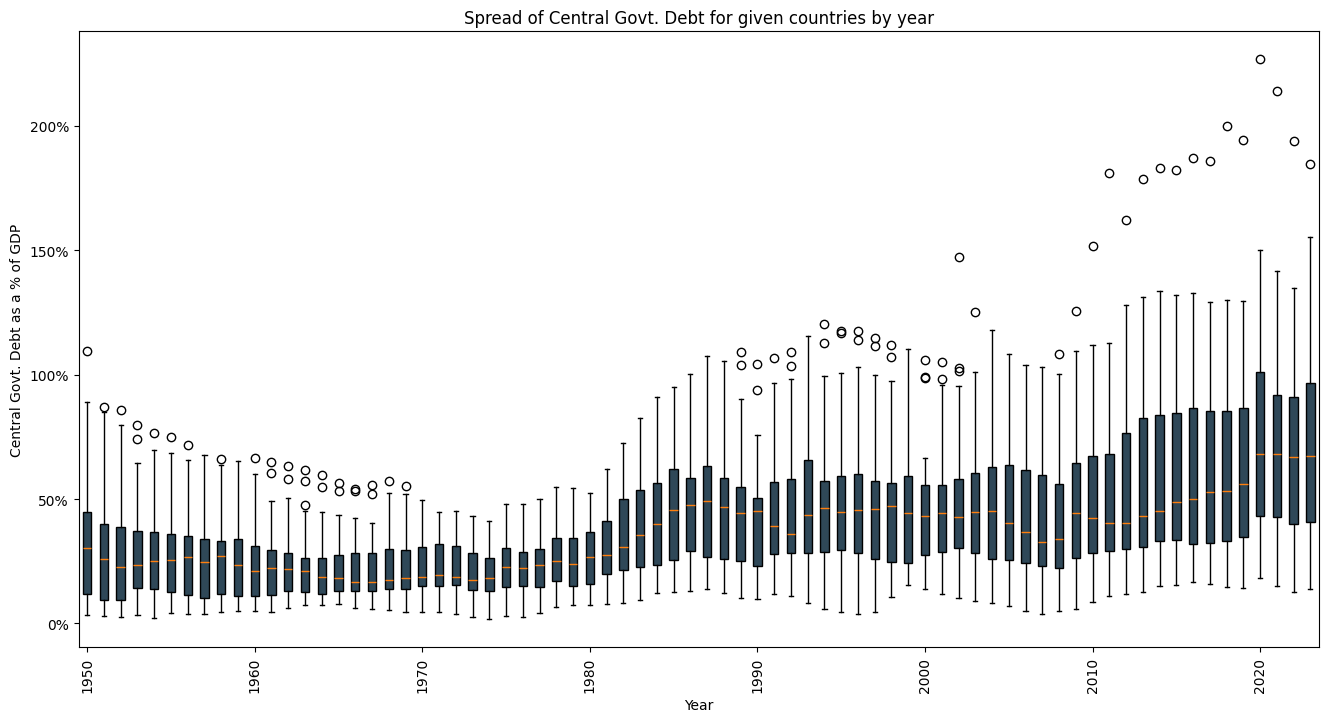

In [4]:
!pip install pandas
!pip install python-calamine
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

# Read/get dataset
central_govt_debt_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/central_govt_debt.xls"
central_govt_debt_df = pd.read_excel(central_govt_debt_url, engine="calamine")

central_govt_debt_df.replace("no data", pd.NA, inplace=True)
central_govt_debt_df.rename(columns={"Central Government Debt (Percent of GDP)": "Countries"}, inplace=True)

central_govt_debt_df.dropna(inplace=True)
central_govt_debt_df.iloc[:, 1:] = central_govt_debt_df.iloc[:, 1:].astype(str).astype(float)
central_govt_debt_df.index = central_govt_debt_df["Countries"]
central_govt_debt_df.drop("Countries", axis = 1, inplace=True)

years = central_govt_debt_df.T.index

# Customization
plt.rcParams['font.family'] = 'sans-serif'
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(8)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

years_spread = np.arange(1950, 2023, step=10, dtype=int)

bxplt = plt.boxplot(central_govt_debt_df, positions=years, patch_artist=True)

for patch in bxplt["boxes"]:
  patch.set_facecolor("#2f4858")

plt.xticks(ticks=years_spread, labels=years_spread, rotation=90)
plt.xlabel("Year")
plt.ylabel("Central Govt. Debt as a % of GDP")
plt.title("Spread of Central Govt. Debt for given countries by year")
plt.show()

Moving back to the linear regression model used on this data, the average of the Pearson correlation of CGD for each of the 21 countries and the United States in the data set is first examined. This is calculated by taking the average of each Pearson correlation of each country (and ignoring the same countries), and was found to be only 0.31. However, this moderate correlation is improved when all 21 countries are used as features in a linear regression model as shown in the next figure.

mean squared:  10.392765360384617
mean absolute:  2.5792385316580675
r squared:  0.9797229290765047


cross val scores mean: 0.9733796151943865
cross val scores mean absolute error: -2.5126907714421822
cross val scores mean squared error: -10.05083013128735


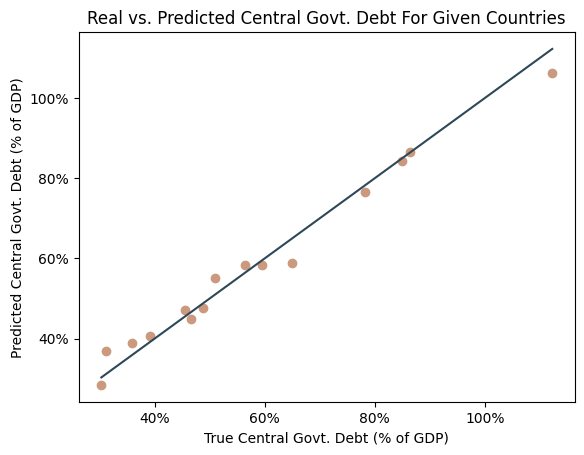

Mean of correlation, not including center diagonal row: 0.3147789264076812


In [12]:
!pip install pandas
!pip install python-calamine
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

# Read/get dataset
central_govt_debt_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/central_govt_debt.xls"
central_govt_debt_df = pd.read_excel(central_govt_debt_url, engine="calamine")

central_govt_debt_df.replace("no data", pd.NA, inplace=True)
central_govt_debt_df.rename(columns={"Central Government Debt (Percent of GDP)": "Countries"}, inplace=True)

central_govt_debt_df.dropna(inplace=True)
central_govt_debt_df.iloc[:, 1:] = central_govt_debt_df.iloc[:, 1:].astype(str).astype(float)
central_govt_debt_df.index = central_govt_debt_df["Countries"]
central_govt_debt_df.drop("Countries", axis = 1, inplace=True)

plt.rcParams['font.family'] = 'sans-serif'

features = central_govt_debt_df.T.drop("United States", axis = 1)
label = central_govt_debt_df.T[["United States"]]

X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

print('mean squared: ', mean_squared_error(y_test, pred))
print("mean absolute: ", mean_absolute_error(y_test, pred))
print('r squared: ', r2_score(y_test, pred))
print("\n")

scores = model_selection.cross_val_score(reg, X_train, y_train, scoring='r2', cv=5)
print("cross val scores mean: " + str(scores.mean()))

scores = model_selection.cross_val_score(reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
print("cross val scores mean absolute error: " + str(scores.mean()))

scores = model_selection.cross_val_score(reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print("cross val scores mean squared error: " + str(scores.mean()))


percent_formatter = mtick.PercentFormatter()
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(percent_formatter)
ax.xaxis.set_major_formatter(percent_formatter)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = '#2f4858', label='Correct Predictions')
plt.scatter(y_test, pred, color = "#cb997e")

plt.xlabel('True Central Govt. Debt (% of GDP)')
plt.ylabel('Predicted Central Govt. Debt (% of GDP)')
plt.title("Real vs. Predicted Central Govt. Debt For Given Countries")
plt.show()

# Average of each correlation of central government debt for each country in the data set.

print("Mean of correlation, not including center diagonal row: " + str(features.corr().values[np.triu_indices_from(features.corr().values,1)].mean()))


The trained model achieved an r squared of 0.98, a mean squared of 10.40, and a mean absolute error of 2.58. When utilizing k-folds cross validation where k = 5, the model achieved an r squared of 0.97, a mean squared error of 10.05, and a mean absolute error of 2.51. In other words, the model performs reasonably well.

# Discussion & considerations
The model suggests that there is a strong positive correlation between the CGD levels of the 21 chosen countries and the CGD level of the United States, and that given other countries’ debt levels, we can accurately predict the CGD levels of the United States.

However, as previously mentioned, due to the limited data in the dataset, more research and more data would be required to provide a convincing result.

Something else to consider: debt, at least in America, generally tends to increase. Will this model lose accuracy if CGD levels ever begin to decrease?

# Code and Data Availability

Raw research can be found in [this Jupyter Notebook](https://github.com/kurealnum/dsrp-2025/blob/main/DSRP_Global_Debt.ipynb).

All data in this research was taken from the International Monetary Fund's (IMF) [Central Government Debt database](https://www.imf.org/external/datamapper/CG_DEBT_GDP@GDD/SWE). Specifically, it was taken from the [Excel spreadsheet](https://www.imf.org/external/datamapper/GDD/GlobalDebtDatabase.xlsx) linked at the bottom of the page.

# Acknowledgements

I was mentored by Peguy Kem-Meka Tiotsop Kadzue, who provided feedback on my research question, research itself, and poster presentation.

I also had many peers who provided me with support, advice and reccomendations. Specifically Vinayak Venugopal, Alesha Qayyoom, and Miguel Orduna

Finally, I was graciously provided a stipend and a scholarship for this research by The Coding School, who has been provided with resources by the U.S. Department of Defense (DoD) STEM, Defense STEM Education Consortium (DSEC), TEDCO Equitech Growth Fund, University of Maryland Discover Fund, and Columbia University.